### Relevante pakker

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Importer data

In [3]:
df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


### Fjerne unødvendige variabler
Alt vi prøver å analysere er forskjellen mellom unike og totale antall brikker basert på kjønn. Kjønn er bestemt hvilket tema datasettet tilhører og av den grunn kan vi fjerne all annen informasjon om temaet. Vi kan også fjerne alle observasjoner som har manglende data om karakteristikkene vi er interessert i.


In [4]:
# Fjerner forklaringsvariabler vi ikke trenger
df2 = df[['Theme', 'Pieces', 'Unique_Pieces']]

# Fjerner observasjoner med manglende datapunkter
df2 = df2.dropna()

# Gjør themes om til string og fjern alle tegn vi ikke vil ha med
df2['Theme'] = df2['Theme'].astype(str)
df2['Theme'] = df2['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# df2

### Katergorisering av kjønn basert på tema

In [5]:
df2.insert(0, "Gender", 'Unisex')

In [23]:
for row in range (0, len(df2['Theme'].values)):
    if (df2['Theme'].values[row] == "Friends" or 
        df2['Theme'].values[row] == "Disney" or
        df2['Theme'].values[row] == "Unikitty" or
        df2['Theme'].values[row] == "LEGO Frozen 2" or
        df2['Theme'].values[row] == "Trolls World Tour" or
        df2['Theme'].values[row] == "Powerpuff Girls"):
            df2['Gender'].values[row] = 'Girl'
        
    if (df2['Theme'].values[row] == "NINJAGO" or 
        df2['Theme'].values[row] == "Star Wars" or
        df2['Theme'].values[row] == "Marvel" or
        df2['Theme'].values[row] == "Batman" or
        df2['Theme'].values[row] == "Speed Champions" or
        df2['Theme'].values[row] == "Jurassic World" or
        df2['Theme'].values[row] == "Spider Man" or
        df2['Theme'].values[row] == "DC" or
        df2['Theme'].values[row] == "Monkie Kid" or
        df2['Theme'].values[row] == "Overwatch" or
        df2['Theme'].values[row] == "Technic" or
        df2['Theme'].values[row] == "Powered UP"):
            df2['Gender'].values[row] = 'Boy'
        
pd.set_option("display.max_rows", None, "display.max_columns", None)
df2

,Gender,Theme,Pieces,Unique_Pieces,Ratio
0,Unisex,DOTS,109.0,6.0,0.055046
1,Unisex,DOTS,109.0,6.0,0.055046
2,Unisex,Classic,52.0,28.0,0.538462
3,Unisex,Classic,60.0,36.0,0.600000
4,Unisex,DOTS,33.0,10.0,0.303030
5,Unisex,DOTS,33.0,9.0,0.272727
6,Unisex,DOTS,33.0,9.0,0.272727
7,Unisex,DOTS,33.0,12.0,0.363636
8,Unisex,DOTS,33.0,10.0,0.303030
9,Unisex,DOTS,33.0,9.0,0.272727


### Legger til en ratio kolonne for eventuell ekstra analyse

In [7]:
df2.insert(4, "Ratio", 0.0)

In [8]:
for row in range (0, len(df2['Pieces'].values)):
    df2['Ratio'].values[row] = df2['Unique_Pieces'].values[row] / df2['Pieces'].values[row]
    
df2

,Gender,Theme,Pieces,Unique_Pieces,Ratio
0,Unisex,DOTS,109.0,6.0,0.055046
1,Unisex,DOTS,109.0,6.0,0.055046
2,Unisex,Classic,52.0,28.0,0.538462
3,Unisex,Classic,60.0,36.0,0.600000
4,Unisex,DOTS,33.0,10.0,0.303030
5,Unisex,DOTS,33.0,9.0,0.272727
6,Unisex,DOTS,33.0,9.0,0.272727
7,Unisex,DOTS,33.0,12.0,0.363636
8,Unisex,DOTS,33.0,10.0,0.303030
9,Unisex,DOTS,33.0,9.0,0.272727


### Visualiser struktur i datasettet

In [9]:
# Antall legosett per kjønn

# plt.hist(df2['Gender'], color='skyblue', edgecolor='black')
# plt.xlabel('Gender (0=unisex, 1=boy, 2=girl)')
# plt.ylabel('Number of sets')
# plt.show()

In [10]:
# Antall unike brikker på hele datasetet

# plt.hist(df2['Unique_Pieces'], color='skyblue', edgecolor='black')
# plt.xlabel('Amount of unique pieces')
# plt.ylabel('Number of sets')
# plt.gca().set_aspect(1)
# plt.show()

In [11]:
df_unisex = df2.loc[df2['Gender'] == 'Unisex']
df_boy = df2.loc[df2['Gender'] == 'Boy']
df_girl = df2.loc[df2['Gender'] == 'Girl']
# df2['Theme'].value_counts()

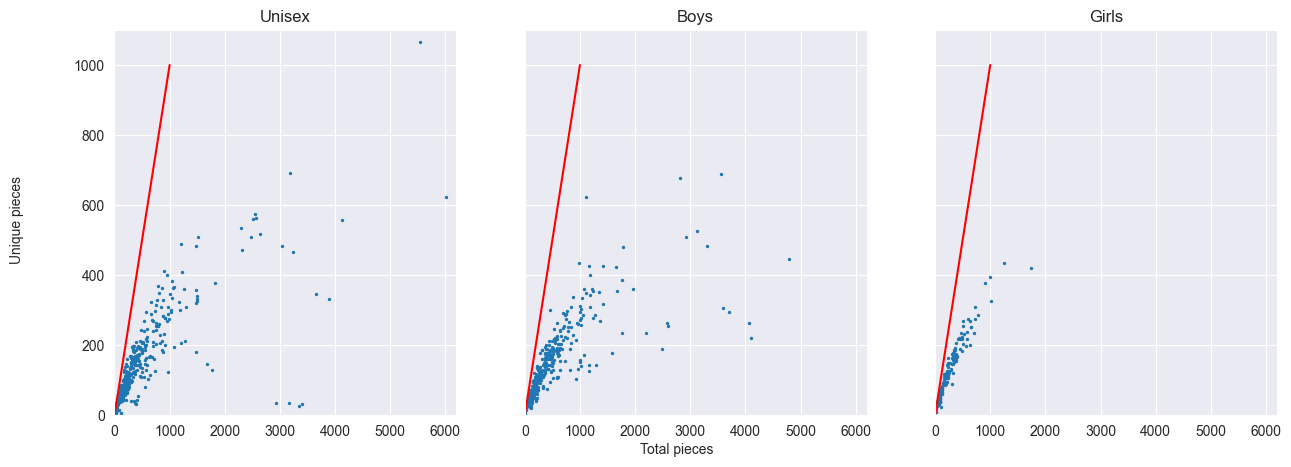

In [12]:
#plt.scatter(df_boy['Pieces'], df_boy['Unique_Pieces'])
#plt.xlabel('Total pieces')
#plt.ylabel('Unique pieces')
#plt.gca().set_aspect(5)
#plt.show()

figure, axis = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'width_ratios': [1.5, 1.5, 1.5]}) 
  
# For unisex
axis[0].scatter(df_unisex['Pieces'], df_unisex['Unique_Pieces'], s=2) 
axis[0].set_title("Unisex") 
axis[0].plot([0, 1000], [0, 1000], color='red')
  
# For boys
axis[1].scatter(df_boy['Pieces'], df_boy['Unique_Pieces'], s=2) 
axis[1].set_title("Boys") 
axis[1].plot([0, 1000], [0, 1000], color='red')


# For girls
axis[2].scatter(df_girl['Pieces'], df_girl['Unique_Pieces'], s=2) 
axis[2].set_title("Girls") 
axis[2].plot([0, 1000], [0, 1000], color='red')


figure.text(0.5, 0.04, 'Total pieces', ha='center', va='center')
figure.text(0.06, 0.5, 'Unique pieces', ha='center', va='center', rotation='vertical')

plt.xlim(0, 6200)
plt.ylim(0, 1100)


plt.show()

                            OLS Regression Results                            
Dep. Variable:          Unique_Pieces   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1480.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.77e-200
Time:                        12:53:01   Log-Likelihood:                -5809.5
No. Observations:                1018   AIC:                         1.162e+04
Df Residuals:                    1016   BIC:                         1.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.8995      2.761     26.042      0.0

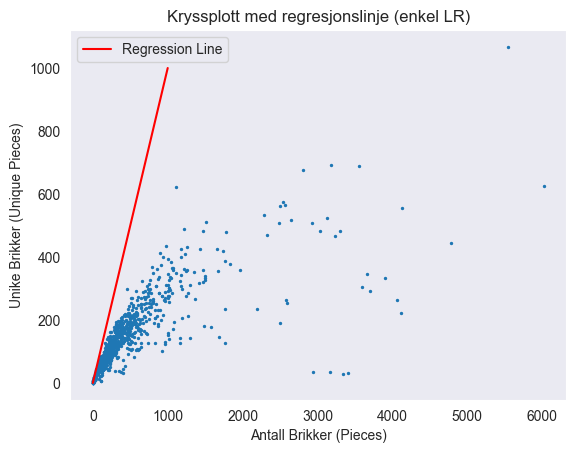

In [13]:
#Enkel linær regresjon med antall brikker som forklaringsvariabel
        
formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

print(resultat.summary())

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df_unisex['Pieces'])

regression_y = slope * regression_x + intercept
#plt.plot(regression_x, regression_y, color='red', label='Regression Line')
# Plotting the regression line
plt.plot([0, 1000], [0, 1000], color='red', label='Regression Line')

# Setting the title
plt.title('Kryssplott med regresjonslinje (enkel LR)')

# Scatter plot of your data
plt.scatter(df2['Pieces'], df2['Unique_Pieces'], s=2)

# Adding x-axis and y-axis labels
plt.xlabel('Antall Brikker (Pieces)')
plt.ylabel('Unike Brikker (Unique Pieces)')

# Adding legend and grid
plt.legend()
plt.grid()

# Display the plot
plt.show()

                            OLS Regression Results                            
Dep. Variable:          Unique_Pieces   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     519.5
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           4.87e-73
Time:                        12:53:02   Log-Likelihood:                -2165.3
No. Observations:                 381   AIC:                             4335.
Df Residuals:                     379   BIC:                             4342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     77.5724      4.582     16.930      0.0

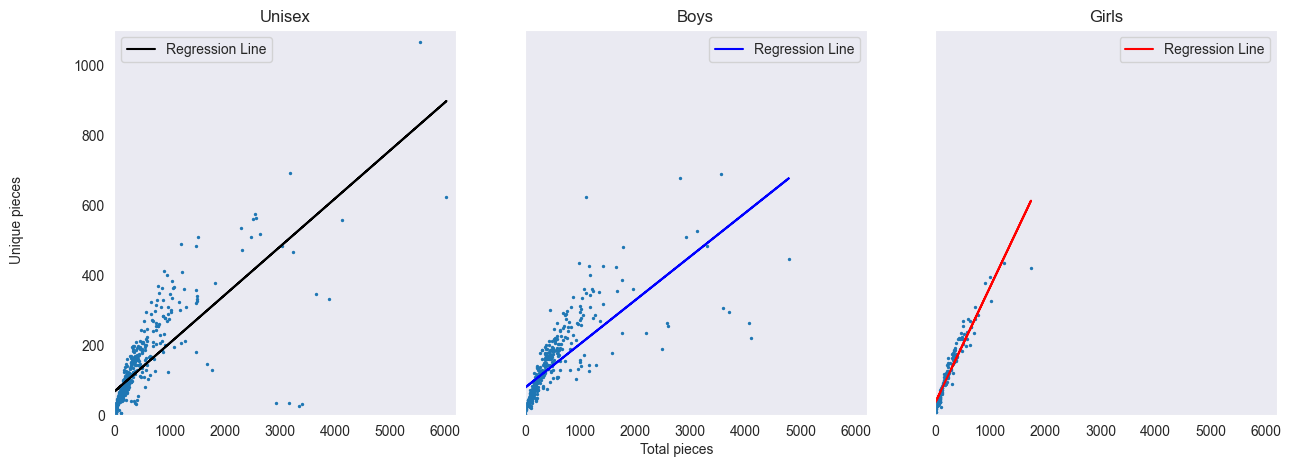

In [14]:
#Linær regresjon med antall brikker som forklaringsmodell for hver gruppe
figure, axis = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'width_ratios': [1.5, 1.5, 1.5]}) 
  
# For unisex 

formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df_unisex)
resultat = modell.fit()

resultat.summary()

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df_unisex['Pieces'])

regression_y = slope * regression_x + intercept

axis[0].plot(regression_x, regression_y, color='black', label='Regression Line')

plt.title('Kryssplott med regresjonslinje (enkel LR)')
axis[0].scatter(df_unisex['Pieces'], df_unisex['Unique_Pieces'], s=2) 
axis[0].set_title("Unisex") 

axis[0].legend()
axis[0].grid()
#axis[0].plot([0, 1000], [0, 1000], color='red')
#reglinje1 


# For boys
formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df_boy)
resultat = modell.fit()

print(resultat.summary())

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df_boy['Pieces'])

regression_y = slope * regression_x + intercept

axis[1].plot(regression_x, regression_y, color='blue', label='Regression Line')

plt.title('Kryssplott med regresjonslinje (enkel LR)')

axis[1].scatter(df_boy['Pieces'], df_boy['Unique_Pieces'], s=2) 
axis[1].set_title("Boys") 
#axis[1].plot([0, 1000], [0, 1000], color='red')

axis[1].legend()
axis[1].grid()
#reglinje2

# For girls
formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df_girl)
resultat = modell.fit()

resultat.summary()

slope = resultat.params['Pieces']
girl_slope = slope

intercept = resultat.params['Intercept']
girl_intercept = intercept

regression_x = np.array(df_girl['Pieces'])
regression_y = slope * regression_x + intercept

axis[2].plot(regression_x, regression_y, color='red', label='Regression Line')

plt.title('Kryssplott med regresjonslinje (enkel LR)')
axis[2].scatter(df_girl['Pieces'], df_girl['Unique_Pieces'], s=2) 
axis[2].set_title("Girls") 
#axis[2].plot([0, 1000], [0, 1000], color='red')
#reglinje3

figure.text(0.5, 0.04, 'Total pieces', ha='center', va='center')
figure.text(0.06, 0.5, 'Unique pieces', ha='center', va='center', rotation='vertical')

plt.xlim(0, 6200)
plt.ylim(0, 1100)

plt.legend()
plt.grid()
plt.show()


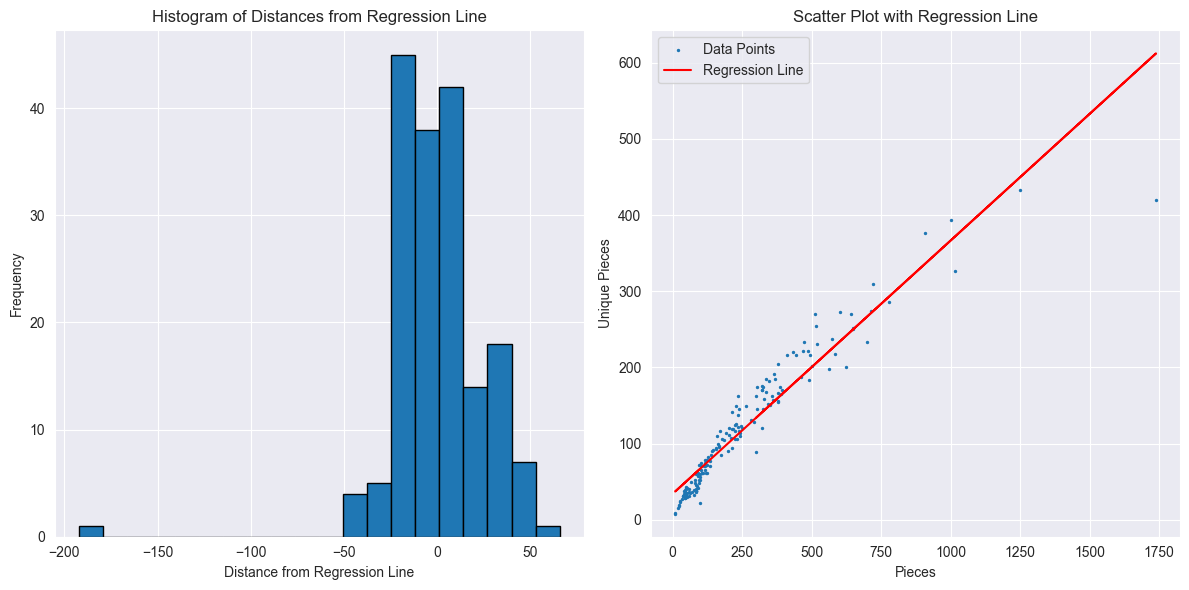

In [15]:
model = smf.ols('Unique_Pieces ~ Pieces', data=df_girl)
result = model.fit()

# Extract slope and intercept
slope = result.params['Pieces']
intercept = result.params['Intercept']

# 2. Calculate Residuals
regression_y = slope * df_girl['Pieces'] + intercept
residuals = df_girl['Unique_Pieces'] - regression_y

# 3. Create Histogram of Distances
plt.figure(figsize=(12, 6))

# Histogram plot
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Distance from Regression Line')
plt.ylabel('Frequency')
plt.title('Histogram of Distances from Regression Line')

# 4. Scatter Plot with Regression Line
plt.subplot(1, 2, 2)
plt.scatter(df_girl['Pieces'], df_girl['Unique_Pieces'], s=2, label='Data Points')
plt.plot(df_girl['Pieces'], regression_y, color='red', label='Regression Line')
plt.xlabel('Pieces')
plt.ylabel('Unique Pieces')
plt.title('Scatter Plot with Regression Line')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
#gjennomsnittlig antall brikker i hver kjønnskategori
print(df_unisex['Pieces'].mean(), df_boy['Pieces'].mean(), df_girl['Pieces'].mean())
print(len(df_unisex), len(df_boy), len(df_girl))

453.02597402597405 504.21259842519686 247.78285714285715
462 381 175


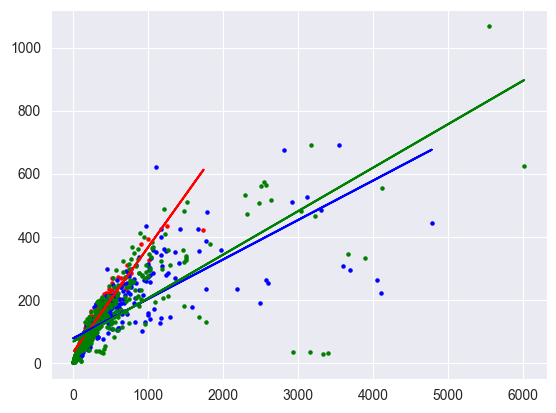

In [17]:
#Alle gruppene lagt inn i samme plot, 9 parametere brukt

#Scatter med små prikker
plt.scatter(df_girl['Pieces'], df_girl['Unique_Pieces'], color='red', s=5)

formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df_girl)
resultat = modell.fit()

resultat.summary()

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df_girl['Pieces'])

regression_y = slope * regression_x + intercept

plt.plot(regression_x, regression_y, color='red', label='Regression Line')

plt.scatter(df_boy['Pieces'], df_boy['Unique_Pieces'], color='blue', s=5)
formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df_boy)
resultat = modell.fit()

resultat.summary()

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df_boy['Pieces'])

regression_y = slope * regression_x + intercept

plt.plot(regression_x, regression_y, color='blue', label='Regression Line')

plt.scatter(df_unisex['Pieces'], df_unisex['Unique_Pieces'], color='green', s=5)

formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df_unisex)
resultat = modell.fit()

resultat.summary()

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df_unisex['Pieces'])

regression_y = slope * regression_x + intercept

plt.plot(regression_x, regression_y, color='green', label='Regression Line')

                            OLS Regression Results                            
Dep. Variable:          Unique_Pieces   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1480.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.77e-200
Time:                        12:53:05   Log-Likelihood:                -5809.5
No. Observations:                1018   AIC:                         1.162e+04
Df Residuals:                    1016   BIC:                         1.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.8995      2.761     26.042      0.0

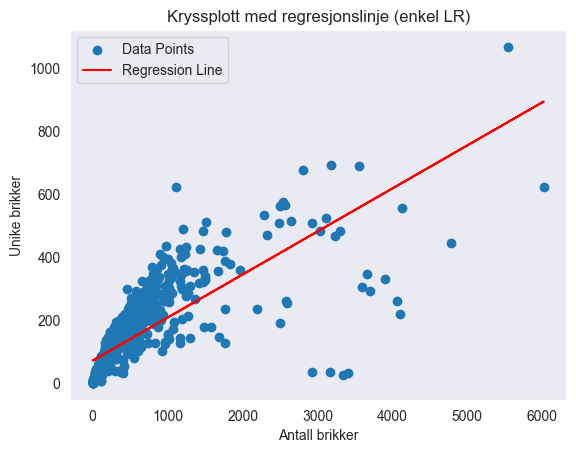

In [18]:
# enkel lineær regresjon
formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

print(resultat.summary())


slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

plt.scatter(df2['Pieces'], df2['Unique_Pieces'], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Unike brikker')
plt.title('Kryssplott med regresjonslinje (enkel LR)')


plt.legend()
plt.grid()
plt.show()



                            OLS Regression Results                            
Dep. Variable:          Unique_Pieces   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1480.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.77e-200
Time:                        12:53:06   Log-Likelihood:                -5809.5
No. Observations:                1018   AIC:                         1.162e+04
Df Residuals:                    1016   BIC:                         1.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.8995      2.761     26.042      0.0

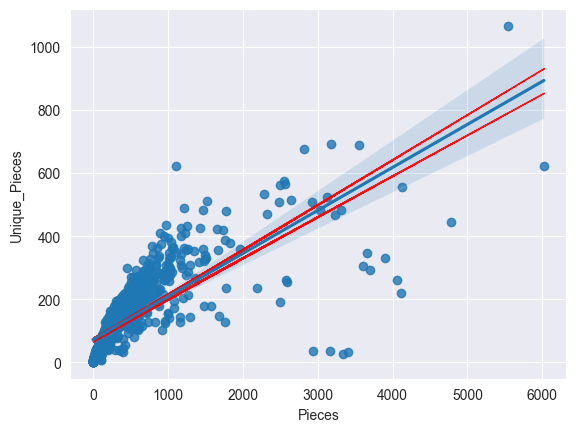

In [19]:
#Regresjonsanalyse med antall unike brikker beskrevet av antall brikker, den blå linjen er regresjonslinja, de røde linjene er spennet for 95% konfidensintervall for regresjonslinjen, det blå gjennomsiktige spennet er 95% prediksjonsintervall for nye legoset
#R^2 = 0.754 (Justert R^2 = 0.753)

formel = 'Unique_Pieces ~ Pieces'

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

print(resultat.summary())

slope = resultat.params['Pieces']
intercept = resultat.params['Intercept']

regression_x = np.array(df2['Pieces'])

regression_y = slope * regression_x + intercept

predictions = resultat.get_prediction()

# Extract the mean, lower, and upper prediction values
predicted_mean = predictions.predicted_mean
predicted_ci = predictions.conf_int(alpha=0.05) 

sns.regplot(data=df2,x='Pieces', y='Unique_Pieces', ci=95)

plt.fill_between(regression_x, predicted_ci[:, 0], predicted_ci[:, 1], color='red', alpha=0.9, label='Prediction Interval')



In [20]:
df2['Gender'] = pd.Categorical(df2['Gender'], categories=['Girl', 'Boy', 'Unisex'], ordered=True)

modell = smf.ols('Unique_Pieces ~ Gender * Pieces', data = df2)
resultat = modell.fit()

print(resultat.summary())

                            OLS Regression Results                            
Dep. Variable:          Unique_Pieces   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     339.8
Date:                Fri, 17 Nov 2023   Prob (F-statistic):          1.28e-213
Time:                        12:53:07   Log-Likelihood:                -5765.4
No. Observations:                1018   AIC:                         1.154e+04
Df Residuals:                    1012   BIC:                         1.157e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

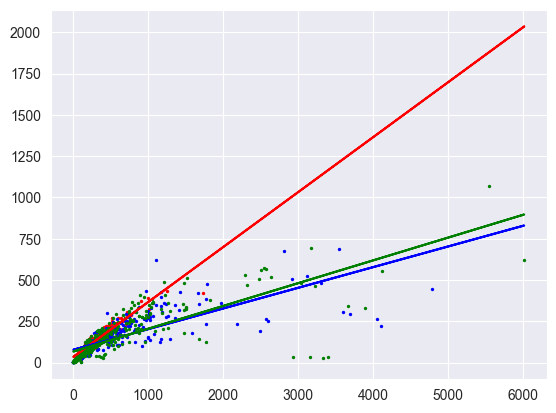

In [21]:
plt.scatter(df_girl['Pieces'], df_girl['Unique_Pieces'], color='red', s=2)
plt.scatter(df_boy['Pieces'], df_boy['Unique_Pieces'], color='blue', s=2)
plt.scatter(df_unisex['Pieces'], df_unisex['Unique_Pieces'], color='green', s=2)

x = np.array(df2['Pieces'])

#Girl
girl_intercept = resultat.params['Intercept']
girl_slope = resultat.params['Pieces']

y = girl_slope * x + girl_intercept

plt.plot(x, y, color='red', label='Regression Line')

#Boy
boy_intercept = resultat.params['Gender[T.Boy]'] + girl_intercept
boy_slope = resultat.params['Gender[T.Boy]:Pieces'] + girl_slope

y = boy_slope * x + boy_intercept

plt.plot(x, y, color='blue', label='Regression Line')

#Unisex
unisex_intercept = resultat.params['Gender[T.Unisex]'] + girl_intercept
unisex_slope = resultat.params['Gender[T.Unisex]:Pieces'] + girl_slope

y = unisex_slope * x + unisex_intercept

plt.plot(x, y, color='green', label='Regression Line')

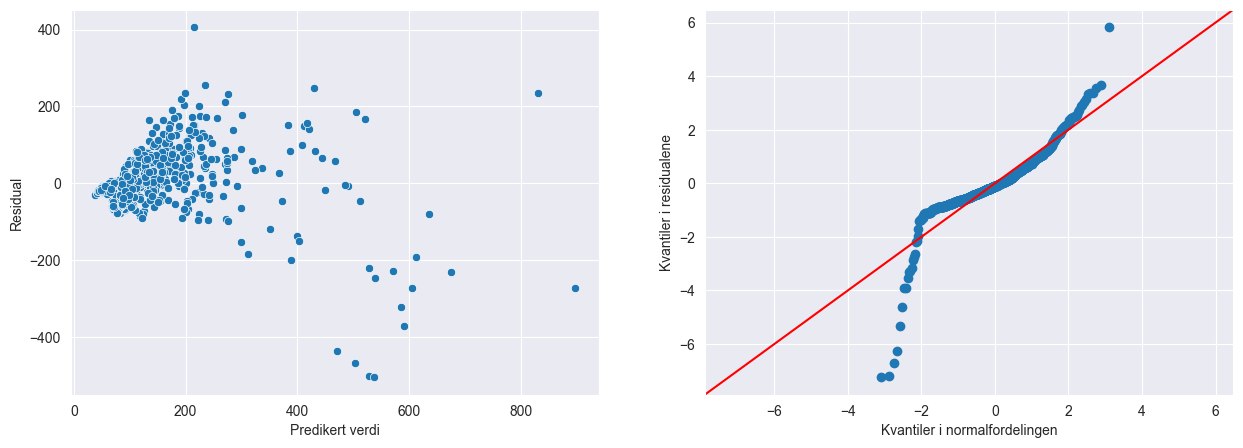

In [22]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

### Test datasett hvor ingen legosett er mindre enn 50 eller større enn 1000 brikker

In [ ]:
df3 = df2.loc[df2['Pieces'] <= 1000].loc[df2['Pieces'] >= 50]
df3

In [ ]:
resultat = smf.ols('Unique_Pieces ~ Gender * Pieces', data = df3).fit()
print(resultat.summary())

In [ ]:
df_girl = df_girl.loc[df_girl['Pieces'] <= 1000].loc[df_girl['Pieces'] >= 50]
df_boy = df_boy.loc[df_boy['Pieces'] <= 1000].loc[df_boy['Pieces'] >= 50]
df_unisex = df_unisex.loc[df_unisex['Pieces'] < 1000].loc[df_unisex['Pieces'] >= 50]

plt.scatter(df_girl['Pieces'], df_girl['Unique_Pieces'], color='red', s=2)
plt.scatter(df_boy['Pieces'], df_boy['Unique_Pieces'], color='blue', s=2)
plt.scatter(df_unisex['Pieces'], df_unisex['Unique_Pieces'], color='green', s=2)

x = np.array(df3['Pieces'])

#Girl
girl_intercept = resultat.params['Intercept']
girl_slope = resultat.params['Pieces']

y = girl_slope * x + girl_intercept

plt.plot(x, y, color='red', label='Regression Line')

#Boy
boy_intercept = resultat.params['Gender[T.Boy]'] + girl_intercept
boy_slope = resultat.params['Gender[T.Boy]:Pieces'] + girl_slope

y = boy_slope * x + boy_intercept

plt.plot(x, y, color='blue', label='Regression Line')

#Unisex
unisex_intercept = resultat.params['Gender[T.Unisex]'] + girl_intercept
unisex_slope = resultat.params['Gender[T.Unisex]:Pieces'] + girl_slope

y = unisex_slope * x + unisex_intercept

plt.plot(x, y, color='green', label='Regression Line')

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x=resultat.fittedvalues, y=resultat.resid, ax=axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line='45', fit=True, ax=axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()